In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm

In [2]:
# You download these by running Xarray Data Structures notebook (changing downloading lines potentially if 
# using something other than urllib)
ds = xr.open_dataset('GLDAS_NOAH025_M_EP.A202010.021.nc4')

In [3]:
da = xr.open_dataarray('air.mon.mean.nc',decode_times=True)

## BASIC STATISTICS & OTHER CHARACTERISTICS IN XARRAY
- aggregation methods use a *dim* instead of *axis* argument (used in Pandas) - so can, for example, average over time dimension, or over a latitude circle (so, over all longitudes for each latitude), etc!
<br><br>
*Clarification from recording*
- examples include (data arrays):
  - da.mean
  - da.max
  - da.min
  - da.shape
  - da.size
  - da.sum

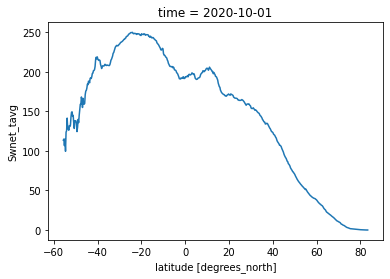

In [4]:
# Example: average net solar radiation over all longitudes for a given latitude 
# Remember this dataset contains just one snapshot in time
lat_swnet = ds['Swnet_tavg'].mean(dim='lon',skipna=True).plot()

- finding maximum or minimum values 
   - *da.max(dim=....)*

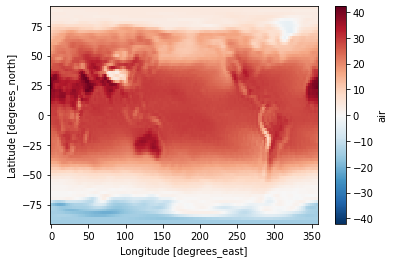

In [5]:
# Plot of max surface temp reached at any time in the monthly mean air temperature dataset
# Oooh, can almost make out the continents without coastlines plotted
da.max(dim='time').plot()

- finding index of max or min values
   - *df.argmax(dim=.....)*: position label returned
   - *df.idxmax(dim=.....)*: coordinate label returned


In [6]:
# Time at which the maximum temperature was reached at each gridpoint
da.idxmax(dim='time')

<xarray.DataArray 'time' (lat: 73, lon: 144)>
array([['2020-07-01T00:00:00.000000000', '2020-07-01T00:00:00.000000000',
        '2020-07-01T00:00:00.000000000', ...,
        '2020-07-01T00:00:00.000000000', '2020-07-01T00:00:00.000000000',
        '2020-07-01T00:00:00.000000000'],
       ['2020-07-01T00:00:00.000000000', '2020-07-01T00:00:00.000000000',
        '2020-07-01T00:00:00.000000000', ...,
        '2020-07-01T00:00:00.000000000', '2020-07-01T00:00:00.000000000',
        '2020-07-01T00:00:00.000000000'],
       ['2004-07-01T00:00:00.000000000', '2004-07-01T00:00:00.000000000',
        '2004-07-01T00:00:00.000000000', ...,
        '2004-07-01T00:00:00.000000000', '2004-07-01T00:00:00.000000000',
        '2004-07-01T00:00:00.000000000'],
       ...,
       ['1957-12-01T00:00:00.000000000', '1957-12-01T00:00:00.000000000',
        '1957-12-01T00:00:00.000000000', ...,
        '1957-12-01T00:00:00.000000000', '1957-12-01T00:00:00.000000000',
        '1957-12-01T00:00:00.000000000'],
       ['1955-12-01T00:00:00.000000000', '1955-12-01T00:00:00.000000000',
        '1955-12-01T00:00:00.000000000', ...,
        '1955-12-01T00:00:00.000000000', '1955-12-01T00:00:00.000000000',
        '1955-12-01T00:00:00.000000000'],
       ['1955-12-01T00:00:00.000000000', '1955-12-01T00:00:00.000000000',
        '1955-12-01T00:00:00.000000000', ...,
        '1955-12-01T00:00:00.000000000', '1955-12-01T00:00:00.000000000',
        '1955-12-01T00:00:00.000000000']], dtype='datetime64[ns]')
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

- brief foray into handling date-time to gain a more useful view of our results
   - *dt.month*, *dt.year*, etc. to access components of the date-time objects
<br><br>

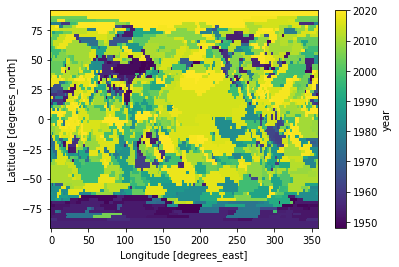

In [7]:
da.idxmax(dim='time').dt.year.plot()